### FINANCIAL DERIVATIVE REPORT
#### CRYPTOCURRENCY - AVALANCHE  (AVAX-USD)

In [1]:
import yfinance as yf             #To download yahoo finance data
import numpy as np                #To perform mathematical functions
import pandas as pd               #For data analysis
import matplotlib.pyplot as plt   #To plot graphs and figures
import scipy.stats as si          #To perform statistical function
import os                         #To print strings

#### DATA COLLECTION

In [2]:
data = yf.download('AVAX-USD' , start='2021-04-01' , end='2022-04-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-31,29.615747,29.886477,26.699457,28.728970,28.728970,221774579
2021-04-01,28.732580,29.296858,27.993950,28.418751,28.418751,172089242
2021-04-02,28.332315,29.574100,28.043386,29.117611,29.117611,167497181
2021-04-03,29.081627,32.780338,28.199560,28.251848,28.251848,424655897
2021-04-04,28.299345,30.093628,27.917349,29.329712,29.329712,185849450


In [4]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-27,85.956848,89.824844,84.566086,89.824844,89.824844,759068100
2022-03-28,89.842903,96.075851,88.663391,89.604553,89.604553,1758254790
2022-03-29,89.523987,95.876266,89.514572,92.840889,92.840889,1642341694
2022-03-30,92.813957,100.078888,90.002953,95.779984,95.779984,1755845999
2022-03-31,95.692749,101.685379,94.261108,96.924660,96.924660,2201715680


In [5]:
data.describe().round(2)

,Open,High,Low,Close,Adj Close,Volume
count,366.00,366.00,366.00,366.00,366.00,3.660000e+02
mean,56.23,59.57,53.27,56.43,56.43,8.518033e+08
std,33.40,35.05,31.93,33.47,33.47,7.069777e+08
min,9.64,10.34,9.34,9.65,9.65,3.146806e+07
25%,23.46,26.54,20.58,23.51,23.51,2.155407e+08
50%,59.71,64.61,56.32,59.92,59.92,7.474369e+08
75%,83.95,87.60,79.24,84.04,84.04,1.241064e+09
max,134.87,146.22,126.19,134.53,134.53,3.379296e+09


#### MOVEMENT OF AVAX-USD FOR 1 YEAR

Text(0.5, 1.0, 'Closing Price Plot of AVAX-USD')

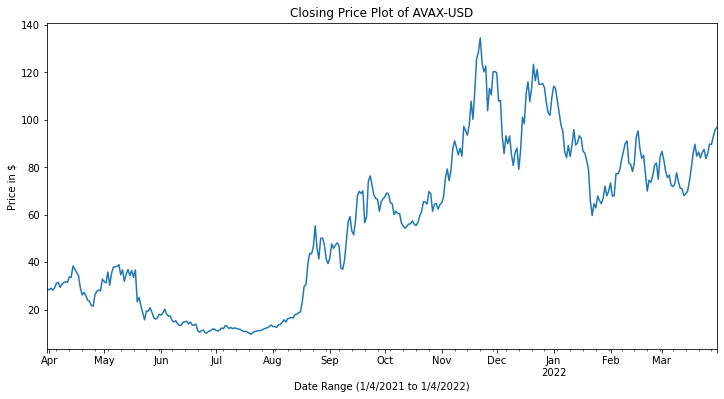

In [6]:
data['Close'].plot(figsize=(12, 6))
plt.xlabel ('Date Range (1/4/2021 to 1/4/2022)')
plt.ylabel ('Price in $')
plt.title ('Closing Price Plot of AVAX-USD')

#### NORMAL & LOG RETURNS AND ANNUALIZED VOLATILITY

In [7]:
normal_return = []
for i in range(0,len(data)-1):
    close_yesterday = data.iloc[i]['Close']
    close_today = data.iloc[i+1]['Close']
    x = (close_today - close_yesterday) / close_yesterday
    normal_return.append(x)
normal_return[0:10]

[-0.010798118263043499,
 0.024591516153778522,
 -0.02973330169879315,
 0.03815197097239049,
 0.0653563037678602,
 0.009853918401993771,
 -0.06585381466464188,
 0.043679635950944276,
 0.024982928492361747,
 0.008600383893970597]

In [8]:
log_return = []
for i in range(0,len(data)-1):
    close_yesterday = data.iloc[i]['Close']
    close_today = data.iloc[i+1]['Close']
    y = np.log(close_today / close_yesterday)
    log_return.append(y)
log_return[0:10]

[-0.010856841055087546,
 0.024294012334261407,
 -0.030184298573351188,
 0.037442181515018776,
 0.06330930073800477,
 0.009805685146931472,
 -0.06812233765219453,
 0.04275258025268017,
 0.024675957322270094,
 0.008563611281048546]

In [9]:
dfnr = pd.DataFrame(normal_return, columns = ['normal']) 
nr = dfnr.mean() * len(dfnr)
nv = dfnr.std() * (len(dfnr) ** 0.5)
print('The annulized normal return is %.8f and its annulized volatility is %.8f' % (nr,nv))

The annulized normal return is 2.31712360 and its annulized volatility is 1.48252048


In [10]:
dflr = pd.DataFrame(log_return, columns = ['log']) 
lr = dflr.mean() * len(dflr)
lv = dflr.std() * (len(dflr) ** 0.5)
print('The annulized log return is %.8f and its annulized volatility is %.8f' % (lr,lv))

The annulized log return is 1.21602797 and its annulized volatility is 1.48834278


In [11]:
#Annualized Log volatility in %
log_return = np.log(data['Close'] / data['Close'].shift(1))
vol_h = np.sqrt(365) * log_return.std()
print('The annualised volatility is', round(vol_h*100,2), '%')

The annualised volatility is 148.83 %


#### LOG RETURNS PLOT

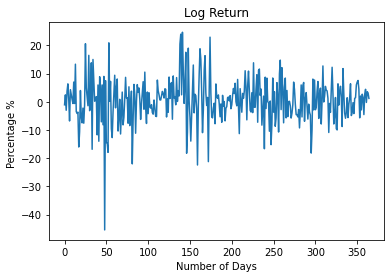

In [12]:
plt.plot(dflr * 100)
plt.xlabel('Number of Days')
plt.ylabel('Percentage % ')
plt.title('Log Return');

#### OPTION PRICING – CRR BINOMIAL TREE

In [13]:
S0 = 96.92               # Spot price of AVAX-USD
K = 100                  # Strike price of option
T = 2/52                 # Time to maturity(2 weeks)
r = 0.0166               # Risk free rate (12 months) -- Source: Bloomberg
sig = 1.48               # Annualized volatility
N = 4                    # Time steps/Number of trees
payoff = "call"          # European Call Option

In [14]:
dT = float(T) / N             # Delta t = T/N
u = np.exp(sig * np.sqrt(dT)) # Up factor
d = 1.0 / u                   # Down factor

In [17]:
#Creating 5*5 matrix
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1
S

array([[ 96.92      , 112.05746678, 129.5591814 , 149.79440431,
        173.19006897],
       [  0.        ,  83.82740276,  96.92      , 112.05746678,
        129.5591814 ],
       [  0.        ,   0.        ,  72.5034405 ,  83.82740276,
         96.92      ],
       [  0.        ,   0.        ,   0.        ,  62.70919427,
         72.5034405 ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
         54.23801986]])

In [16]:
a = np.exp(r * dT)    # Risk free compound return
p = (a - d)/ (u - d)  # Risk neutral up probability
q = 1.0 - p           # Risk neutral down probability
p , q

(0.4643300981772442, 0.5356699018227558)

In [18]:
# Call Option value at each final node
S_T = S[:,-1] 
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
V

array([[ 0.        ,  0.        ,  0.        ,  0.        , 73.19006897],
       [ 0.        ,  0.        ,  0.        ,  0.        , 29.5591814 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

In [19]:
# Call Option value at earlier nodes calculated backwards
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[ 9.73657585, 17.56022223, 30.4745994 , 49.81036457, 73.19006897],
       [ 0.        ,  2.95777375,  6.37099749, 13.72302702, 29.5591814 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

###### EUROPEAN CALL OPTION VALUE - CRR BINOMIAL TREE

In [20]:
print('European ' + payoff, str( V[0,0]))

European call 9.736575853364569


#### OPTION PRICING – BLACK SCHOLES MODEL (BSM)

In [29]:
# Function to calculate European Call Option using BSM
def euro_option_bs(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    return option_value

###### EUROPEAN CALL OPTION VALUE - BSM

In [31]:
euro_option_bs(96.92, 100, 2/52 , 0.0166 ,1.48 , 'call')

9.912186596616053

In [32]:
S = np.linspace(45,145,11)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i], 100, 2/52 , 0.0166 ,1.48 , 'call')

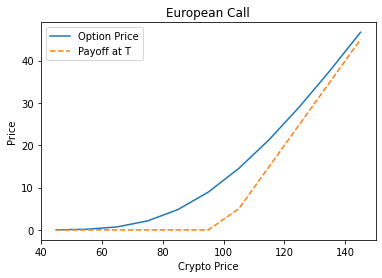

In [33]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-100,0), '--')
plt.xlabel('Crypto Price')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price','Payoff at T'])

#### GREEKS

###### DELTA

In [34]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [41]:
# Delta Call
delta(96.92, 100, 2/52 , 0.0166, 0 ,1.48 , 'call')

0.5157710148632996

In [42]:
# Delta Put
delta(96.92, 100, 2/52 , 0.0166, 0 ,1.48 , 'put')

-0.4842289851367005

###### DELTA 2D GRAPH

In [43]:
S = np.linspace(40,160,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 100, 2/52 , 0.0166, 0 ,1.48 , 'call')
    Delta_Put [i] = delta(S[i], 100, 2/52 , 0.0166, 0 ,1.48 , 'put')

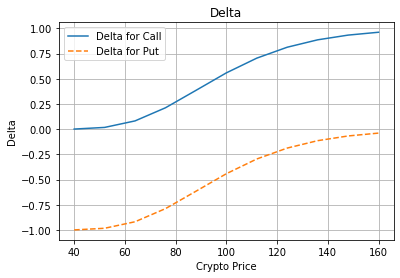

In [44]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Crypto Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call','Delta for Put'])

###### DELTA 3D GRAPH

In [59]:
S = np.linspace(40,160, 51)
T = np.linspace(0.01, 2, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 100, T[i] , 0.0166, 0 ,1.48, 'call')

/var/folders/g_/qz1sjc314q90xxp17vvysb2c0000gn/T/ipykernel_698/743355234.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


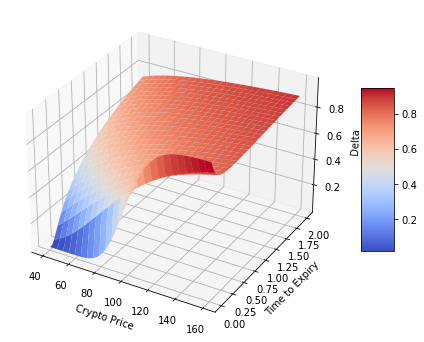

In [60]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Crypto Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

###### GAMMA

In [47]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [48]:
# Gamma Call
gamma(96.92, 100, 2/52 , 0.0166, 0 ,1.48 , 'call')

0.01417039928344477

###### GAMMA 2D GRAPH

In [49]:
S = np.linspace(40,160,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 100, 2/52 , 0.0166, 0 ,1.48 , 'call')

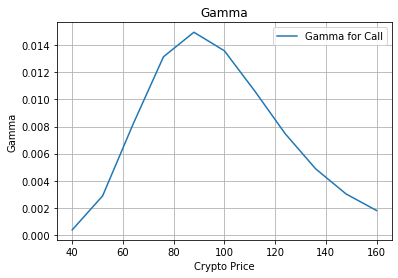

In [50]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Crypto Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call'])

###### GAMMA 3D GRAPH

In [67]:
S = np.linspace(40, 160, 51)
T = np.linspace(0.01, 2, 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 100, T[i], 0.0166, 0 ,1.48, 'call')

/var/folders/g_/qz1sjc314q90xxp17vvysb2c0000gn/T/ipykernel_698/1922918594.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


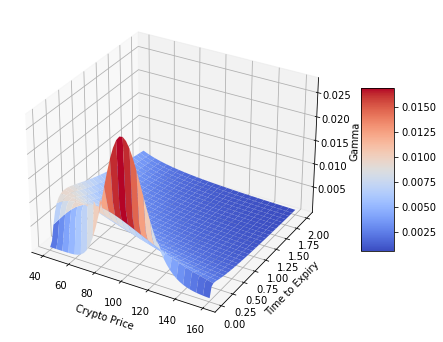

In [68]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Crypto Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

###### SPEED

In [53]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [54]:
# Speed Call
speed(96.92, 100, 2/52 , 0.0166, 0 , 1.48 , 'call')

-3.257992285374505e-05

###### SPEED 2D GRAPH

In [55]:
S = np.linspace(40,160,11)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 100, 2/52 , 0.0166, 0 ,1.48 , 'call')

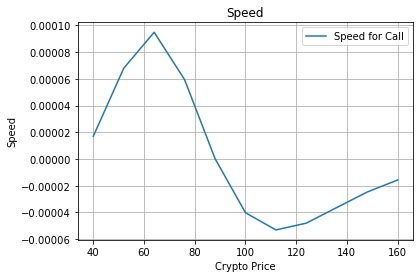

In [56]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Crypto Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Call'])

###### SPEED 3D GRAPH

In [69]:
S = np.linspace(40, 160, 51)
T = np.linspace(0.01, 2, 51)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 100, T[i], 0.0166, 0 ,1.48, 'call')

/var/folders/g_/qz1sjc314q90xxp17vvysb2c0000gn/T/ipykernel_698/3084007888.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


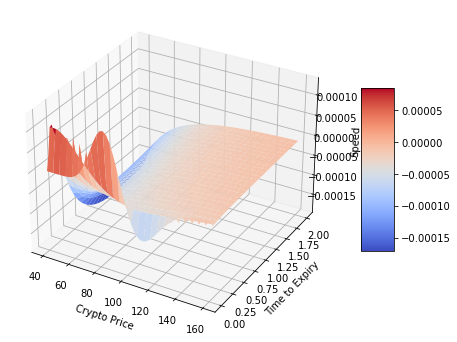

In [70]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Crypto Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

###### THETA

In [71]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    return theta

In [72]:
# Theta Call
theta(96.92, 100, 2/52 , 0.0166,0, 1.48 ,'call')

146.4467401193226

###### THETA 2D GRAPH

In [73]:
T = np.linspace(0.01,1,11)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(96.92, 100, T[i], 0.0166,0, 1.48 ,'call')

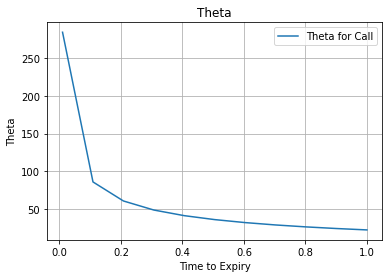

In [74]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call'])

###### THETA 3D GRAPH

In [75]:
S = np.linspace(40, 160, 51)
T = np.linspace(0.01, 2, 51)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 100, T[i], 0.0166, 0 ,1.48, 'call')

/var/folders/g_/qz1sjc314q90xxp17vvysb2c0000gn/T/ipykernel_698/2883061110.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


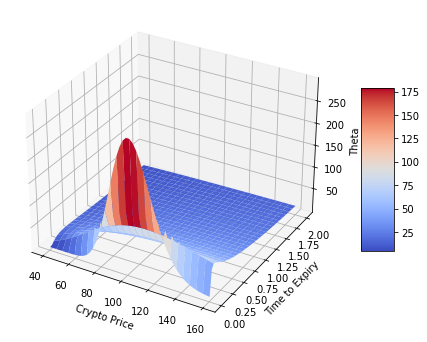

In [76]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Crypto Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

###### RHO

In [77]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    return rho

In [78]:
# Rho Call
rho(96.92, 100, 2/52 , 0.0166, 0 ,1.48 , 'call')

1.5413976986128826

###### RHO 2D GRAPH

In [79]:
r = np.linspace(0,0.05,11)
Rho_Call = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(96.92, 100, 2/52 , r[i], 0 ,1.48 , 'call')

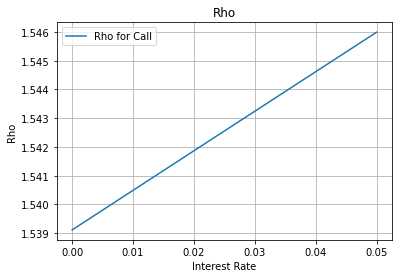

In [80]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call'])

###### RHO 3D GRAPH

In [81]:
S = np.linspace(40, 160, 51)
T = np.linspace(0.01, 2, 51)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 100, T[i], 0.0166, 0 ,1.48, 'call')

/var/folders/g_/qz1sjc314q90xxp17vvysb2c0000gn/T/ipykernel_698/298383028.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


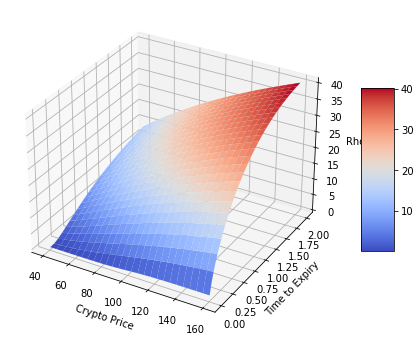

In [82]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Crypto Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

###### VEGA

In [83]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [85]:
# Vega Call
vega(96.92, 100, 2/52 , 0.0166, 0 ,1.48 , 'call')

7.576999629553082

###### VEGA 2D GRAPH

In [86]:
vol = np.linspace(0.5,3.5,11)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(96.92, 100, 2/52 , 0.0166, 0 , vol[i], 'call')

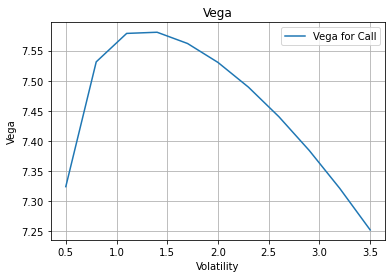

In [87]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call'])

###### VEGA 3D GRAPH

In [94]:
S = np.linspace(40, 160, 51)
T = np.linspace(0.01, 7, 51)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 100, T[i], 0.0166, 0 ,1.48, 'call')

/var/folders/g_/qz1sjc314q90xxp17vvysb2c0000gn/T/ipykernel_698/617837880.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


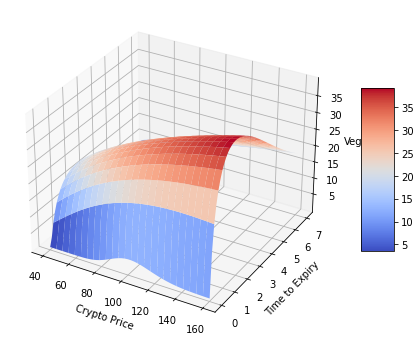

In [95]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Crypto Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [98]:
v = vega(96.92, 100, 2/52 , 0.0166, 0 ,1.48 , 'call')
print('The value of Vega is', v.round(4),'.','If the volatility increases 1%, then the value of the call option will increase $', v.round(4)*0.01,'.')

The value of Vega is 7.577 . If the volatility increases 1%, then the value of the call option will increase $ 0.07577 .
